d493_NNHonly

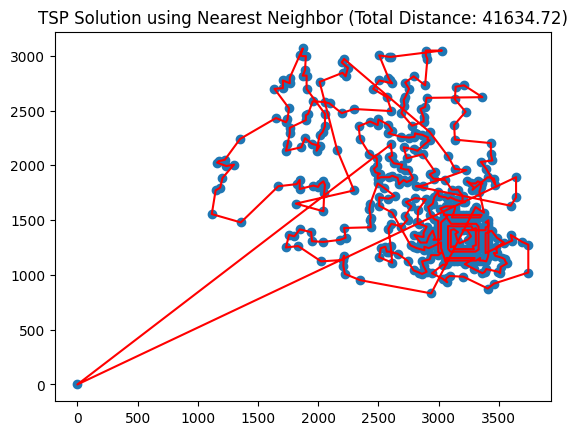

Time taken to render: 1.1147496700286865 seconds




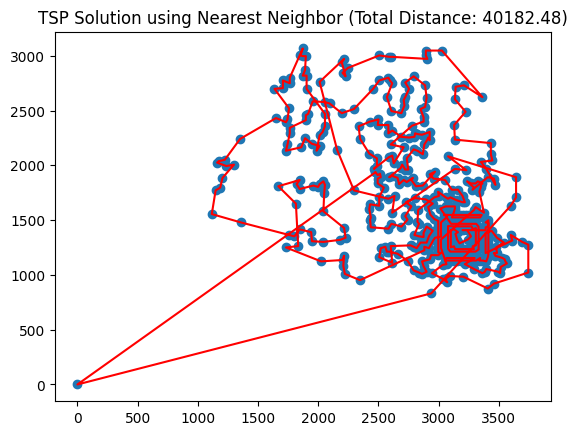

Time taken to render: 0.9578204154968262 seconds




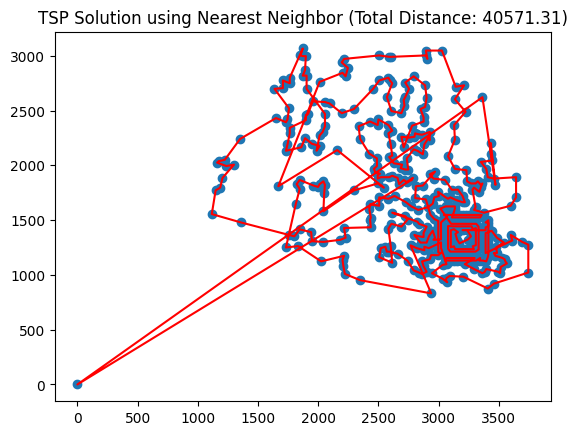

Time taken to render: 1.0944898128509521 seconds




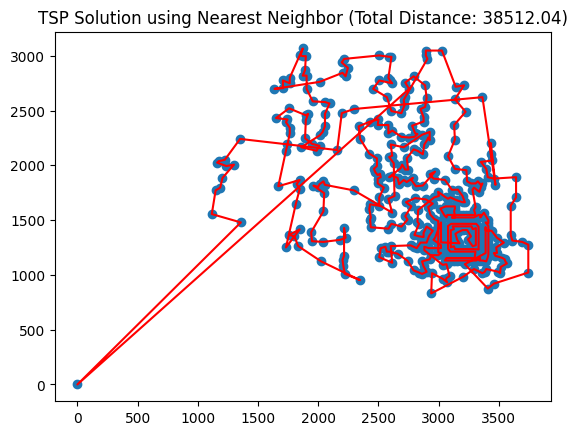

Time taken to render: 1.1502885818481445 seconds




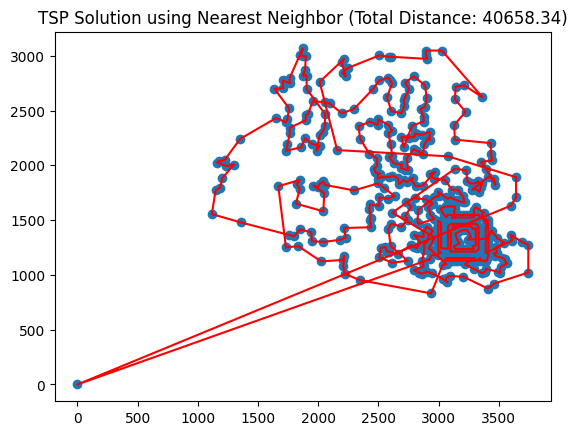

Time taken to render: 0.9992144107818604 seconds




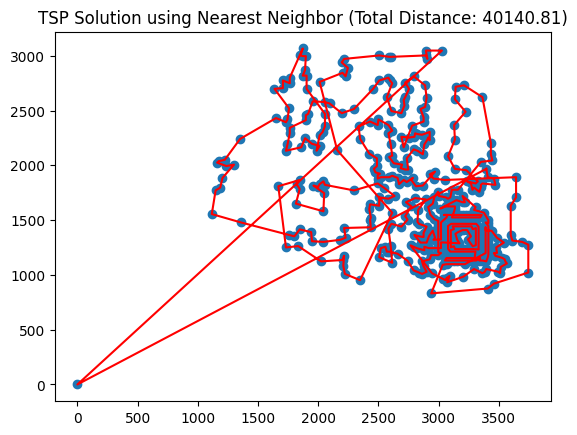

Time taken to render: 0.9418916702270508 seconds




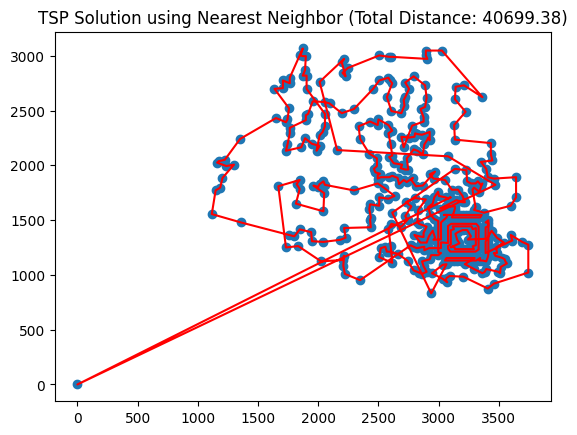

Time taken to render: 0.9450857639312744 seconds




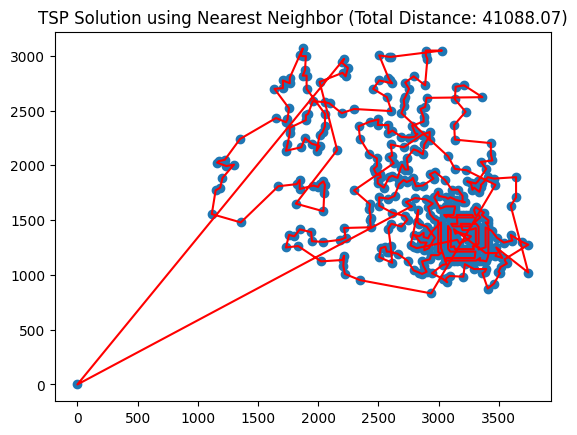

Time taken to render: 1.0935490131378174 seconds




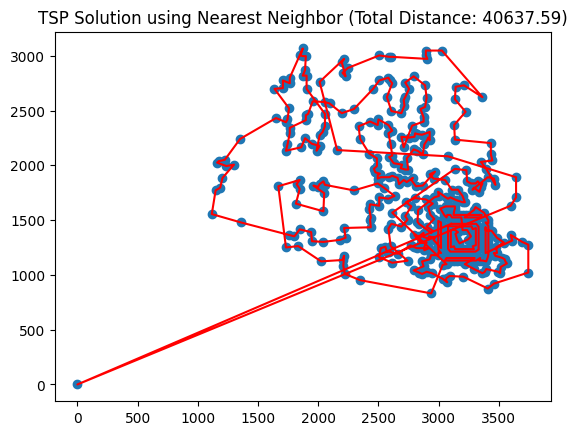

Time taken to render: 1.0623588562011719 seconds




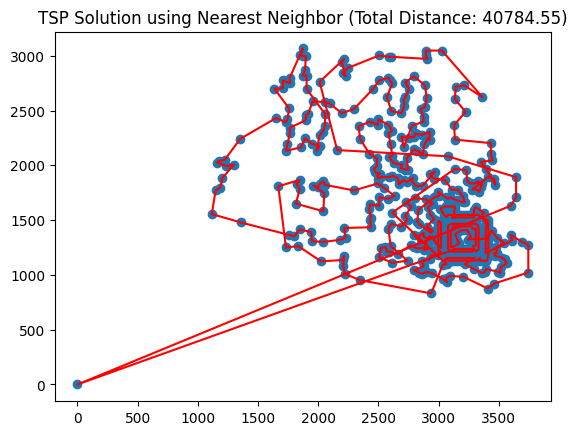

Time taken to render: 0.9719421863555908 seconds


Average Tour Length: 40490.92723209744
Time taken to render: 0.9721541404724121 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "d493.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


d493_NNHwith2OPT

Iteration 20: Improved total distance to 41761.12
Iteration 1989: Improved total distance to 41756.17
Iteration 2475: Improved total distance to 41728.77
Iteration 4349: Improved total distance to 41654.18
Iteration 5228: Improved total distance to 41631.01
Iteration 5232: Improved total distance to 41455.23
Iteration 6231: Improved total distance to 41450.85
Iteration 6232: Improved total distance to 41448.98
Iteration 6233: Improved total distance to 41439.79
Iteration 6344: Improved total distance to 41263.20
Iteration 6711: Improved total distance to 41262.94
Iteration 9632: Improved total distance to 41184.80
Iteration 13366: Improved total distance to 40826.07
Iteration 14421: Improved total distance to 40806.66
Iteration 14423: Improved total distance to 40793.56
Iteration 14424: Improved total distance to 40745.58
Iteration 14763: Improved total distance to 40728.44
Iteration 17957: Improved total distance to 40648.54
Iteration 32040: Improved total distance to 40617.35
Iterati

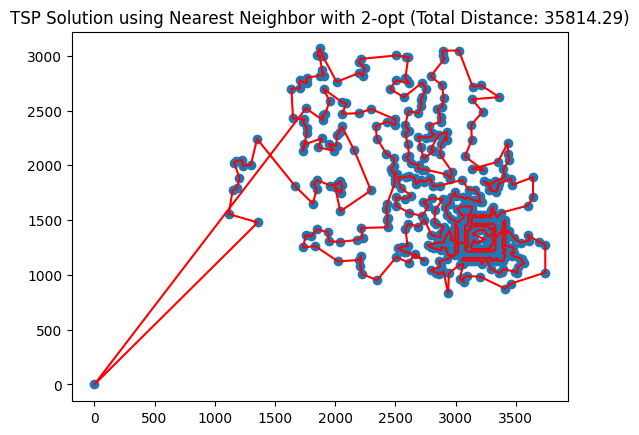

Time taken to render: 3479.993525505066 seconds


Average Tour Length: 35814.28666756745
Time taken to render: 3479.994063615799 seconds


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "d493.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(1):
    start_time = time.time()
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


d493_NNHwith3OPT

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 3):
                for j in range(i + 2, self.n - 1):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        new_tour = self.three_opt_swap(tour, i, j, k)
                        if self.total_distance(new_tour) < self.total_distance(tour):
                            tour = new_tour
                            improvement = True
                            print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\d+\s+([\d.e+-]+)\s+([\d.e+-]+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(1)), float(match.group(2))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "d493.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

for i in range(1):
    start_time = time.time()
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate average tour length
average_tour_length = np.mean(total_distances)
end_time = time.time()
rendered_time = end_time - start_time
print("Average Tour Length:", average_tour_length)
print("Time taken to render:", rendered_time, "seconds")


Iteration 487: Improved total distance to 41013.45
Iteration 496: Improved total distance to 40942.69
Iteration 498: Improved total distance to 40418.90
Iteration 104950: Improved total distance to 40308.18
Iteration 119484: Improved total distance to 40267.24
Iteration 136800: Improved total distance to 40260.99
Iteration 356612: Improved total distance to 40176.94
Iteration 366141: Improved total distance to 40173.30
Iteration 372871: Improved total distance to 40131.79
Iteration 1285938: Improved total distance to 40126.53
Iteration 1399848: Improved total distance to 40122.43
Iteration 1420770: Improved total distance to 40074.57
Iteration 1444390: Improved total distance to 39936.65
Iteration 1513345: Improved total distance to 39898.09
Iteration 1520398: Improved total distance to 39858.54
Iteration 1542142: Improved total distance to 39778.87
Iteration 3392117: Improved total distance to 39762.76
Iteration 3476434: Improved total distance to 39756.64
Iteration 3476888: Improved 